In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import matplotlib.colors as mcolors

In [2]:
cardiodata_initial= pd.read_csv('cardio_train.csv',)
cardiodata_initial.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [3]:
cardiodata= pd.read_csv('cardio_train.csv', sep=";")#sep to give appropriate spacing between variables
cardiodata.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#convert age from days to years
cardiodata['age'] = np.round(cardiodata['age'] / 365).astype(int)
cardiodata1=pd.DataFrame(cardiodata['age'])
cardiodata1.head()

,age
0,50
1,55
2,52
3,48
4,48


In [5]:
#exclude unwanted variabless
cardiodf=pd.DataFrame(cardiodata[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']])
cardiodf.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
#introduce dataset BMI
cardiodf['BMI'] = (cardiodf['weight'] / (cardiodf['height'] / 100) ** 2).round(3) # display BMI up to 3 decimal places
cardiodf.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.928
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.508
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011


In [7]:
cardio_num = cardiodf[['age','height','weight','BMI','ap_hi','ap_lo','cardio']]

cardio_num.describe()

,age,height,weight,BMI,ap_hi,ap_lo,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,164.359229,74.205690,27.556505,128.817286,96.630414,0.499700
std,6.765294,8.210126,14.395757,6.091525,154.011419,188.472530,0.500003
min,30.000000,55.000000,10.000000,3.472000,-150.000000,-70.000000,0.000000
25%,48.000000,159.000000,65.000000,23.875000,120.000000,80.000000,0.000000
50%,54.000000,165.000000,72.000000,26.374000,120.000000,80.000000,0.000000
75%,58.000000,170.000000,82.000000,30.222000,140.000000,90.000000,1.000000
max,65.000000,250.000000,200.000000,298.667000,16020.000000,11000.000000,1.000000


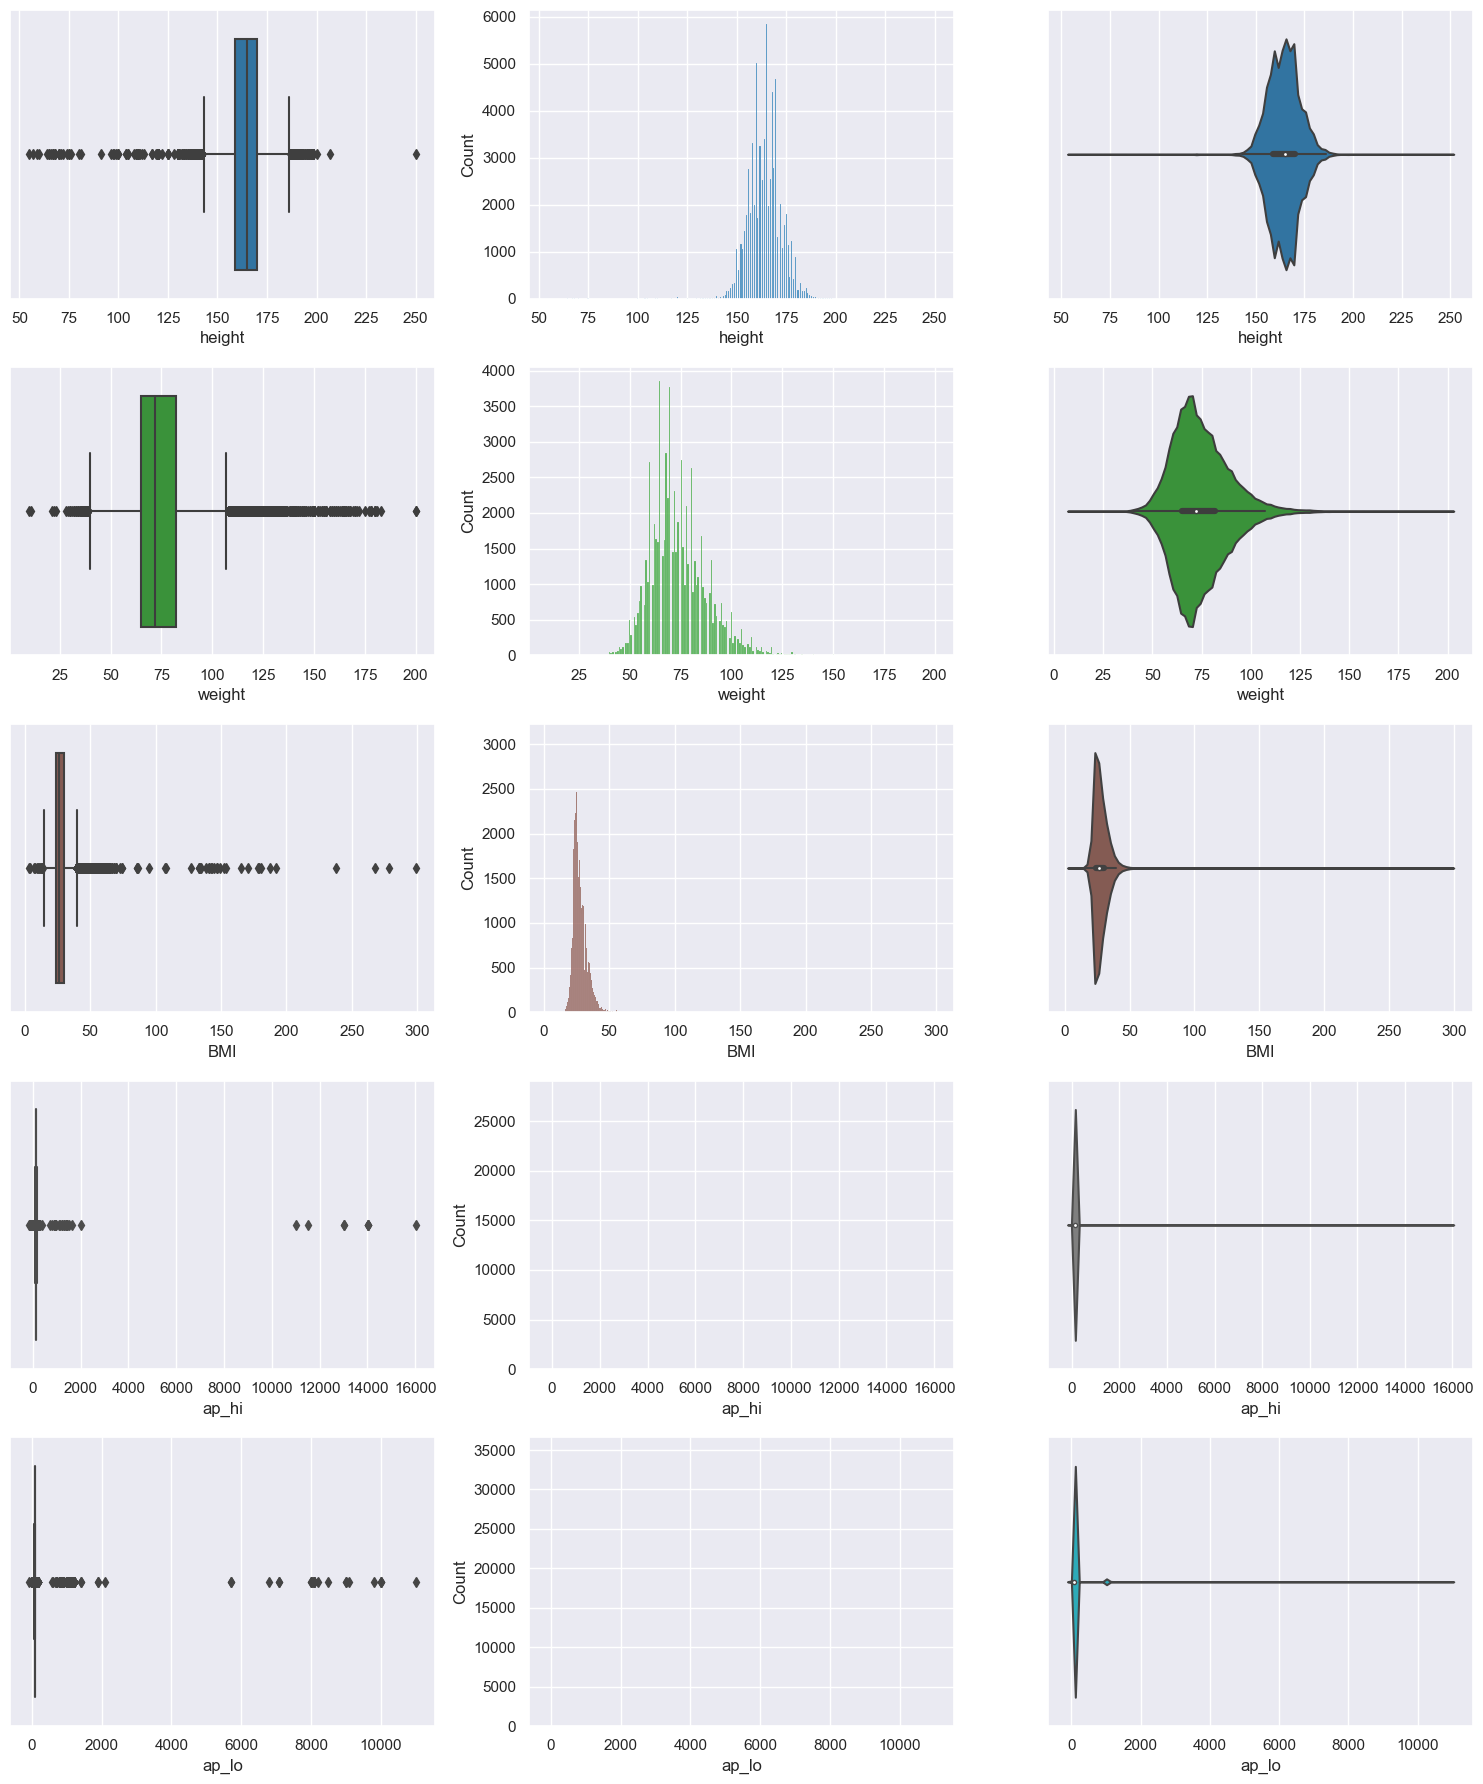

In [12]:
# Function to generate colors
def generate_colors(num_colors_needed):
    # Generate a larger set of distinct colors using the tab10 colormap
    colors = plt.cm.tab10(np.linspace(0, 1, num_colors_needed))
    # Convert the colors to hex format
    hex_colors = [mcolors.to_hex(color) for color in colors]
    return hex_colors

# Specify the variables you want to work with
variables = ['height', 'weight', 'BMI', 'ap_hi', 'ap_lo']

# Create subplots
f, axes = plt.subplots(len(variables), 3, figsize=(15, 18))

# Generate colors based on the number of variables
num_colors_needed = len(variables)
colors = generate_colors(num_colors_needed)

# Iterate over each variable
for idx, var in enumerate(variables):
    # Plot a horizontal boxplot, histogram, and violin plot of the uncleaned variable
    sb.boxplot(x=cardiodf[var], orient='h', color=colors[idx], ax=axes[idx, 0])
    sb.histplot(cardiodf[var], color=colors[idx], ax=axes[idx, 1])
    sb.violinplot(x=cardiodf[var], orient='h', color=colors[idx], ax=axes[idx, 2])

# Adjust the layout of the plot and display it
plt.tight_layout()
plt.show()

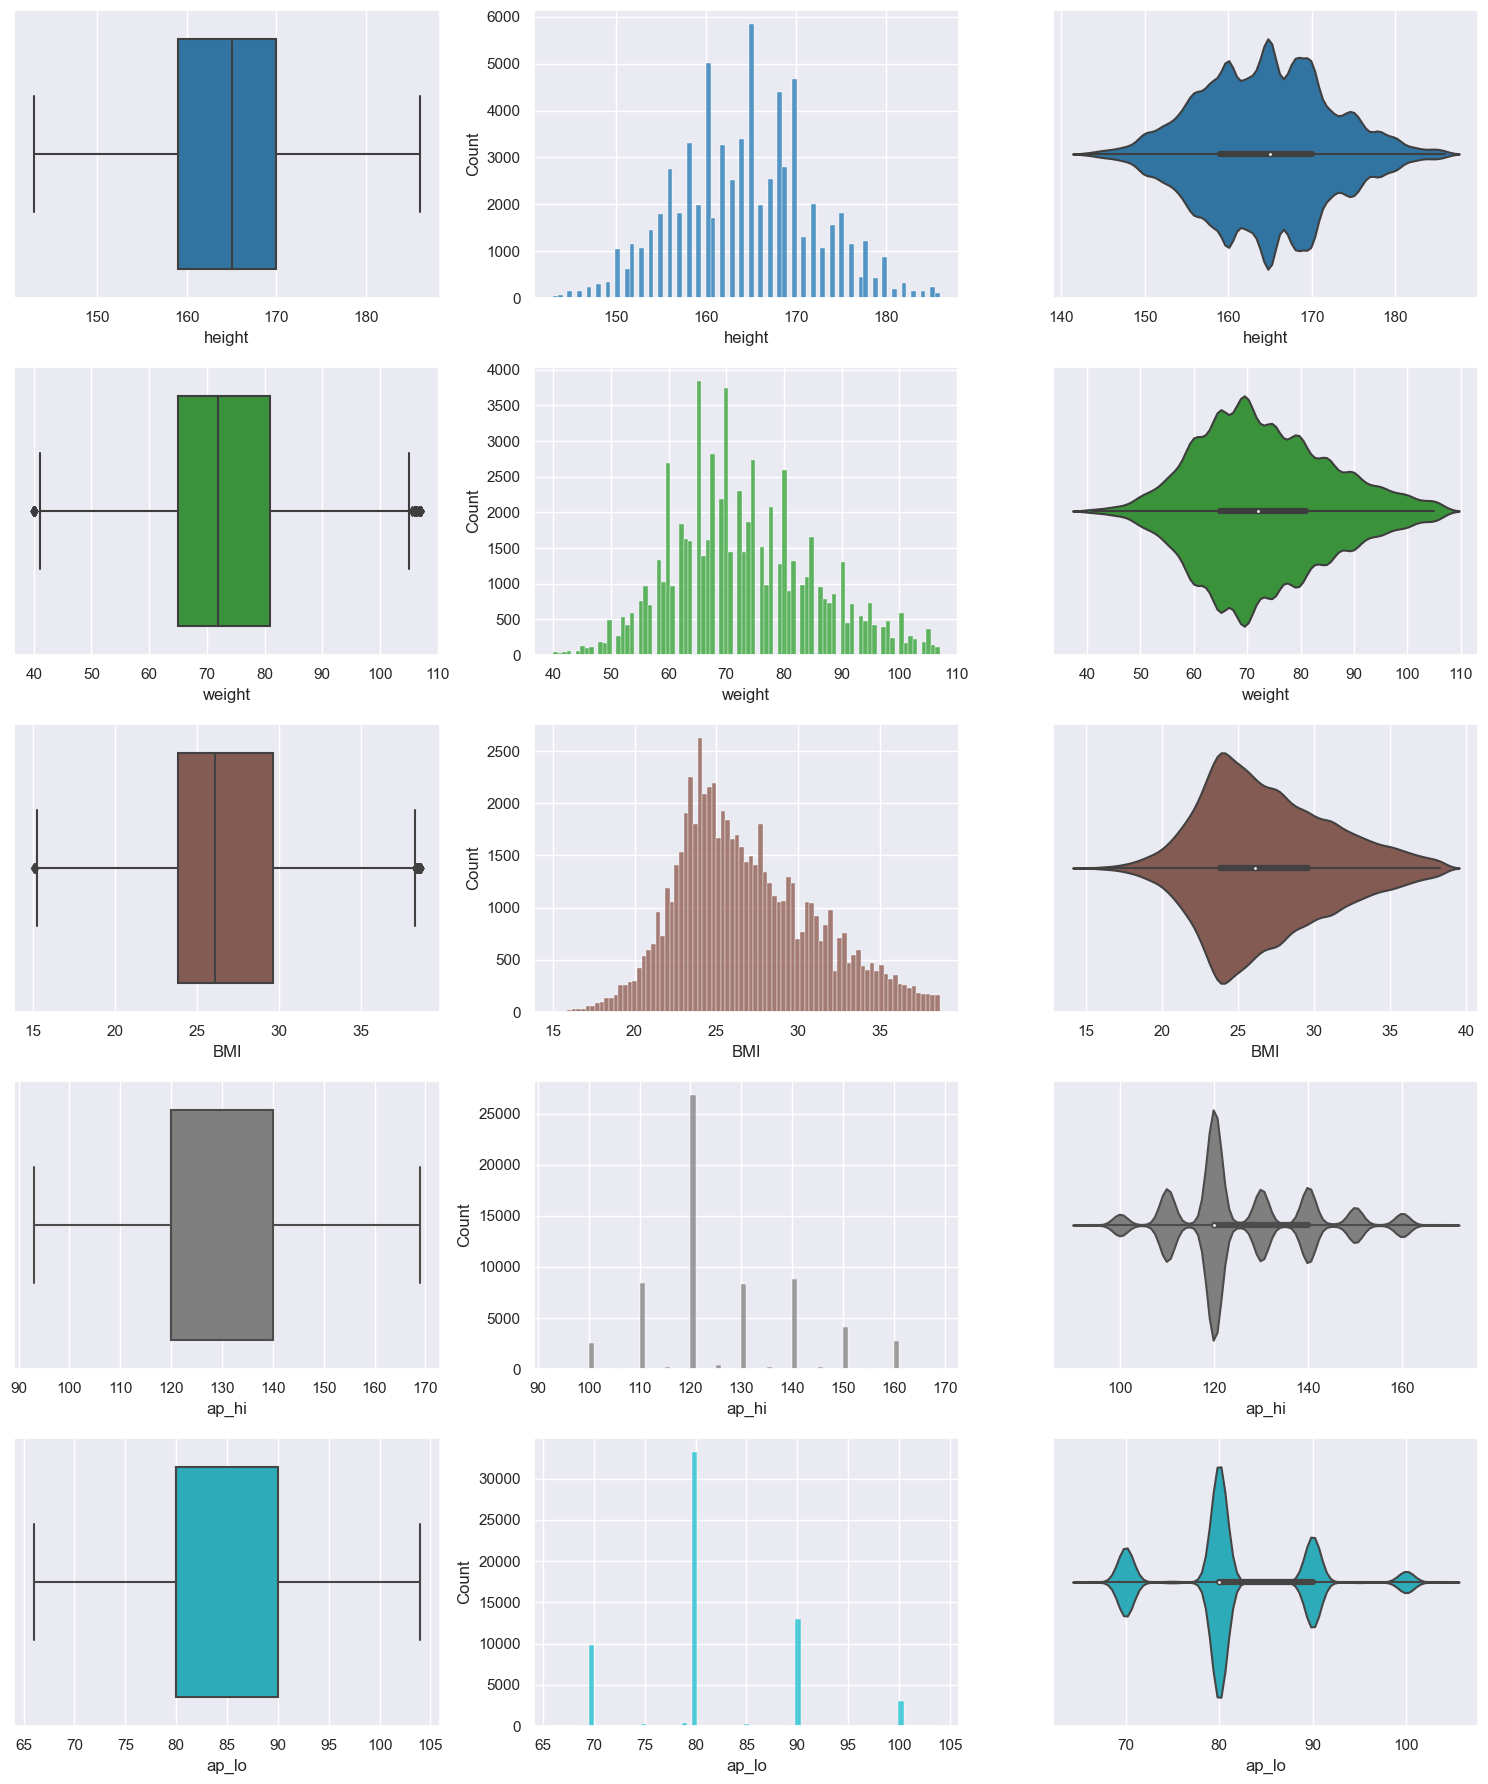

In [13]:
# Function to flag outliers using IQR method
def flag_outliers(df, var, degree=1.5):
    # Calculate the interquartile range (IQR)
    lq = df[var].quantile(0.25)
    uq = df[var].quantile(0.75)
    iqr = uq - lq

    # Calculate the lower and upper bounds
    lowerbound = lq - degree * iqr
    upperbound = uq + degree * iqr

    return lowerbound, upperbound

# Function to drop outliers and plot the boxplot, histogram, and violin plot
def drop_outliers_and_plot(df, var, lowerbound, upperbound, ax, color):
    # Filter out the rows with outliers and create a cleaned DataFrame
    df_cleaned = df[(df[var] > lowerbound) & (df[var] < upperbound)]
    
    # Plot a horizontal boxplot, histogram, and violin plot of the cleaned variable
    sb.boxplot(x=df_cleaned[var], orient='h', color=color, ax=ax[0])
    sb.histplot(df_cleaned[var], color=color, ax=ax[1])
    sb.violinplot(x=df_cleaned[var], orient='h', color=color, ax=ax[2])

    return df_cleaned

# Function to generate colors
def generate_colors(num_colors_needed):
    # Generate a larger set of distinct colors using the tab10 colormap
    colors = plt.cm.tab10(np.linspace(0, 1, num_colors_needed))
    # Convert the colors to hex format
    hex_colors = [mcolors.to_hex(color) for color in colors]
    return hex_colors

# Specify the variables you want to work with (excluding 'gender' column)
variables = ['height', 'weight', 'BMI', 'ap_hi', 'ap_lo']

# Create a copy of the original DataFrame to work with
cardiodf_cleaned = cardiodf.copy()

# Create subplots
f, axes = plt.subplots(len(variables), 3, figsize=(15, 18))

# Generate colors based on the number of variables
num_colors_needed = len(variables)
colors = generate_colors(num_colors_needed)

# Iterate over each variable
for idx, var in enumerate(variables):
    # Calculate the bounds for the current variable
    lowerbound, upperbound = flag_outliers(cardiodf_cleaned, var)
    
    # Remove outliers and plot the cleaned data
    cardiodf_cleaned = drop_outliers_and_plot(cardiodf_cleaned, var, lowerbound, upperbound, axes[idx], colors[idx])

plt.tight_layout()
plt.show()

In [14]:
# Define age groups with a difference of 5 after 30
def categorize_age(age):
    if age < 30:
        return 'Under 30'
    elif age >= 30 and age < 35:
        return '30-34'
    elif age >= 35 and age < 40:
        return '35-39'
    elif age >= 40 and age < 45:
        return '40-44'
    elif age >= 45 and age < 50:
        return '45-49'
    elif age >= 50 and age < 55:
        return '50-54'
    elif age >= 55 and age < 60:
        return '55-59'
    else:
        return '60 and above'

# Define BMI groups with 7 categories
def categorize_bmi(bmi):
    if bmi < 16:
        return 'Severely Underweight'
    elif 16 <= bmi < 17:
        return 'Moderately Underweight'
    elif 17 <= bmi < 18.5:
        return 'Mildly Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese Class I'
    elif 35 <= bmi < 40:
        return 'Obese Class II'
    else:
        return 'Obese Class III'

# Define function to calculate Mean Arterial Pressure (MAP)
def calculate_map(systolic, diastolic):
    return diastolic + 1/3 * (systolic - diastolic)

# Define MAP groups with 6 categories
def categorize_map(map_value):
    if map_value < 93.33:
        return 'Optimal'
    elif 93.33 <= map_value < 99.00:
        return 'Normal'
    elif 99.00 <= map_value < 105.67:
        return 'High Normal'
    elif 105.67 <= map_value < 119.00:
        return 'Grade 1 Hypertension'
    elif 119.00 <= map_value < 132.33:
        return 'Grade 2 Hypertension'
    else:
        return 'Grade 3 Hypertension'


# Apply categorization to the dataset
cardiodf_cleaned.loc[:, 'Age Group'] = cardiodf_cleaned['age'].apply(categorize_age)
cardiodf_cleaned.loc[:, 'BMI Group'] = cardiodf_cleaned['BMI'].apply(categorize_bmi)
cardiodf_cleaned.loc[:, 'MAP'] = calculate_map(cardiodf_cleaned['ap_hi'], cardiodf_cleaned['ap_lo'])
cardiodf_cleaned.loc[:, 'MAP Group'] = cardiodf_cleaned['MAP'].apply(categorize_map)

In [15]:
cardiodf_cleaned.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Age Group,BMI Group,MAP,MAP Group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967,50-54,Normal Weight,90.000000,Optimal
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.928,55-59,Obese Class I,106.666667,Grade 1 Hypertension
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.508,50-54,Normal Weight,90.000000,Optimal
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710,45-49,Overweight,116.666667,Grade 1 Hypertension
5,60,1,151,67.0,120,80,2,2,0,0,0,0,29.385,60 and above,Overweight,93.333333,Normal


In [16]:
cardiodf_cleaned.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
count,60649.000000,60649.000000,60649.000000,60649.000000,60649.000000,60649.000000,60649.000000,60649.000000,60649.000000,60649.000000,60649.000000,60649.000000,60649.000000,60649.000000
mean,53.369833,1.354713,164.581213,72.692995,126.045656,81.585649,1.350459,1.217563,0.087536,0.052186,0.804679,0.488252,26.858033,96.405651
std,6.742687,0.478430,7.474079,11.830535,13.650348,7.541889,0.669644,0.564969,0.282622,0.222403,0.396451,0.499866,4.198807,8.840076
min,30.000000,1.000000,143.000000,40.000000,95.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.036000,77.333333
25%,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.833000,93.333333
50%,54.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.122000,93.333333
75%,58.000000,2.000000,170.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.586000,103.333333
max,65.000000,2.000000,186.000000,107.000000,169.000000,104.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,38.626000,125.333333


In [17]:
# Select the specific columns
specific_columns = cardiodf_cleaned[['age','height','weight','ap_hi','ap_lo','smoke','alco','active','BMI','cardio']]

# Calculate the correlation matrix
correlation_matrix = specific_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

             age    height    weight     ap_hi     ap_lo     smoke      alco  \
age     1.000000 -0.091592  0.049339  0.201687  0.144151 -0.047628 -0.028308   
height -0.091592  1.000000  0.368120 -0.001598  0.015353  0.190699  0.094814   
weight  0.049339  0.368120  1.000000  0.220712  0.203417  0.075506  0.068314   
ap_hi   0.201687 -0.001598  0.220712  1.000000  0.702943  0.023215  0.026312   
ap_lo   0.144151  0.015353  0.203417  0.702943  1.000000  0.021627  0.030724   
smoke  -0.047628  0.190699  0.075506  0.023215  0.021627  1.000000  0.345204   
alco   -0.028308  0.094814  0.068314  0.026312  0.030724  0.345204  1.000000   
active -0.010264 -0.010378 -0.011607  0.004247 -0.000024  0.027513  0.026964   
BMI     0.106986 -0.201699  0.832744  0.232566  0.204154 -0.034129  0.014976   
cardio  0.234408 -0.020888  0.152417  0.430743  0.330704 -0.021024 -0.013099   

          active       BMI    cardio  
age    -0.010264  0.106986  0.234408  
height -0.010378 -0.201699 -0.020888  
we

<Axes: >

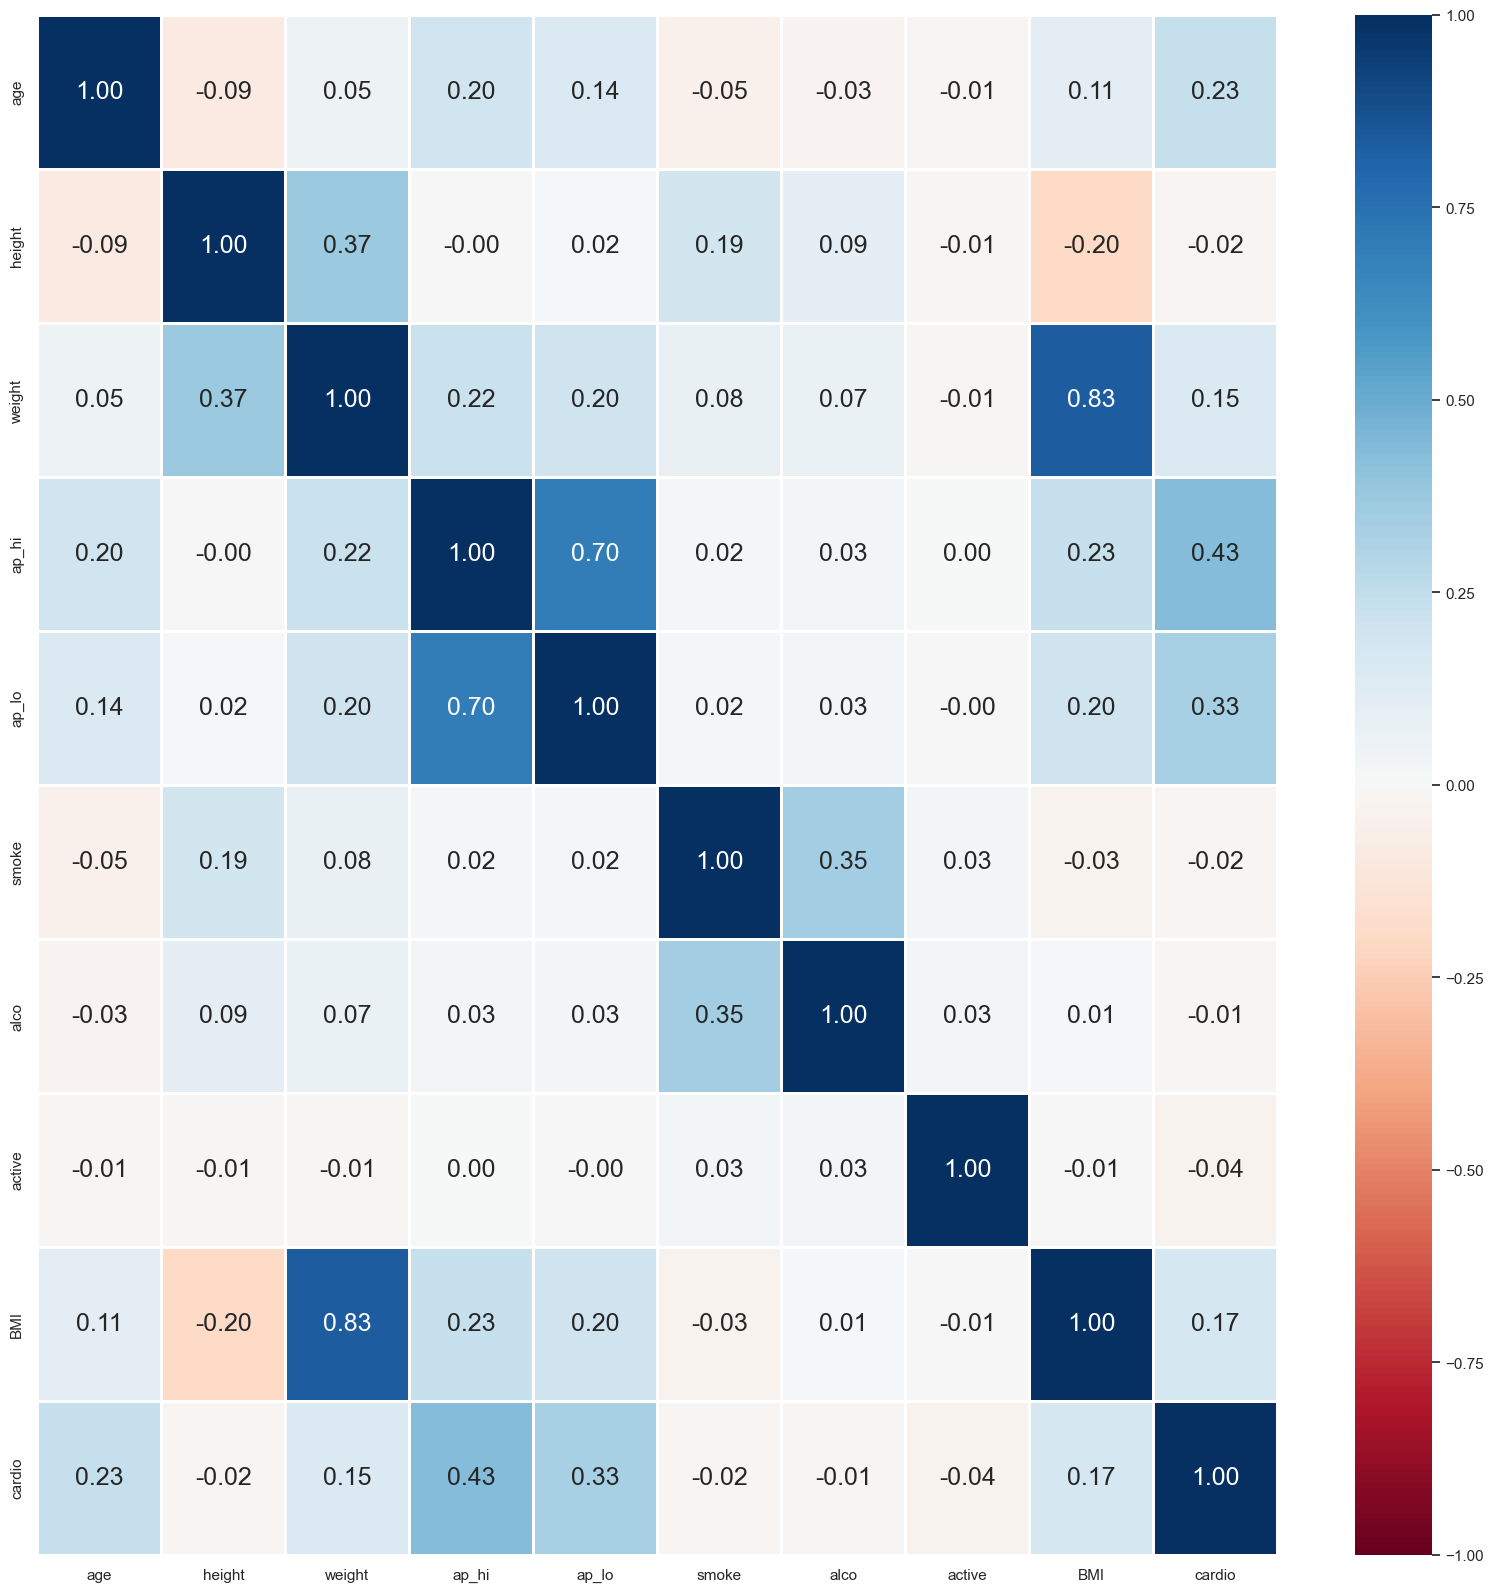

In [18]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(specific_columns.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

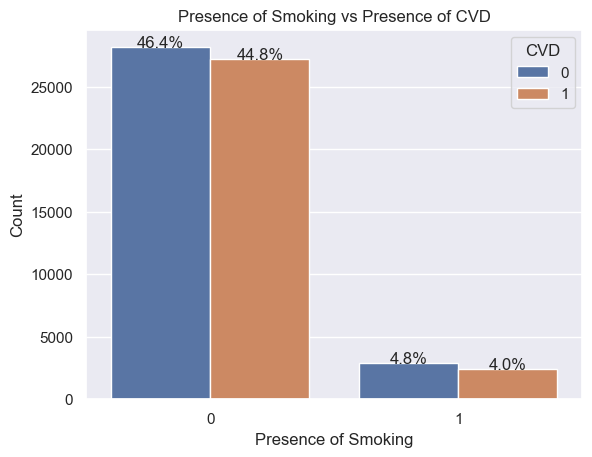

In [19]:
import seaborn as sns
# Create a countplot
sns.countplot(x='smoke', hue='cardio', data=cardiodf_cleaned)

# Calculate percentage for each category
total_count = len(cardiodf_cleaned)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2.,
             height + 0.1,
             '{:.1f}%'.format((height/total_count)*100),
             ha="center")

# Add labels and title
plt.xlabel('Presence of Smoking')
plt.ylabel('Count')
plt.title('Presence of Smoking vs Presence of CVD')

# Show plot
plt.legend(title='CVD', loc='upper right')
plt.show()

# Machine Learning Models

In [8]:
# Preparation for Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Randomly choose 10,000 samples from the dataset
cardiodf_sampled = cardiodf.sample(n=10000, random_state=42)

# Define the predictors and response
X = cardiodf_sampled[['BMI', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active']] # predictors
y = cardiodf_sampled['cardio'] # response

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Gaussian Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

# Scaling the features (Gaussian Naive Bayes not sensitive to scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fitting the model onto the training data
nb_model.fit(X_train_scaled, y_train)

# Making predictions and calculate accuracy
y_pred = nb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Gaussian Naive Bayes Model Accuracy: {accuracy:.5f}")
print(f"Precision Score: {precision:.5f}")
print(f"Recall: {recall:.5f}")

Gaussian Naive Bayes Model Accuracy: 0.52850
Precision Score: 0.84848
Recall: 0.05662


### K-Nearest Neigbor (KNN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training the KNN Model
knn_model = KNeighborsClassifier(n_neighbors=15)  # n_neighbors is k
knn_model.fit(X_train, y_train)

# Making predictions and calculate accuracy
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"K-Nearest Neighbor (KNN) Model Accuracy: {accuracy:.5f}")
print(f"Precision Score: {precision:.5f}")
print(f"Recall: {recall:.5f}")

K-Nearest Neighbor (KNN) Model Accuracy: 0.71850
Precision Score: 0.73562
Recall: 0.67240


In [11]:
# Introducing GridSearchCV to improve the KNN Model
from sklearn.model_selection import GridSearchCV

# Setting up GridSearchCV to find the best n_neighbors with jumps of 5
param_grid = {'n_neighbors': [1] + list(range(5, 501, 5))}  # starting at '1', followed by '5', then subsequently with an interval of '5' up till '500'
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Finding the best n_neighbors value
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best n_neighbors: {best_n_neighbors}")

# Training the KNN model with the best n_neighbors
knn_model_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_model_best.fit(X_train, y_train)

# Making predictions and calculate accuracy
y_pred = knn_model_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Improved K-Nearest Neighbor (KNN) Model Accuracy: {accuracy:.5f}")
print(f"Precision Score: {precision:.5f}")
print(f"Recall: {recall:.5f}")

Best n_neighbors: 440
Improved K-Nearest Neighbor (KNN) Model Accuracy: 0.72700
Precision Score: 0.77722
Recall: 0.62791


### SVM Classifier

In [12]:
# from sklearn.model_selection import GridSearchCV (already imported for improved KNN Model)
from sklearn.svm import SVC

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Create and fit the GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Making predictions and calculate accuracy
y_pred = grid_search.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"SVM Classifier Model Accuracy: {accuracy:.5f}")
print(f"Precision Score: {precision:.5f}")
print(f"Recall: {recall:.5f}")

SVM Classifier Model Accuracy: 0.72200
Precision Score: 0.77370
Recall: 0.61881


# Prediction

`Since the improved K-Nearest Neighbor (KNN) Model has the highest accuracy, we shall use the improved K-Nearest Neighbor (KNN) as the model to predict whether someone has CVD`

In [13]:
def predict_cardio_disease(height_cm, weight_kg, ap_hi, ap_lo, smoke, alco, active, knn_model_best, scaler):
    # Calculate BMI from height and weight, rounding to 3 decimal places
    bmi = round(weight_kg / (height_cm / 100) ** 2, 3)
    
    # Create a DataFrame for the input features with the same column names as the training data
    input_features = pd.DataFrame({
        'BMI': [bmi],
        'ap_hi': [ap_hi],
        'ap_lo': [ap_lo],
        'smoke': [smoke],
        'alco': [alco],
        'active': [active]
    })
    
    # Scale the features using the same scaler used during model training
    input_features_scaled = scaler.transform(input_features)
    
    # Make predictions using the trained KNeighborsClassifier model
    predicted_class = knn_model_best.predict(input_features_scaled)
    
    # Map predicted class to risk level
    if predicted_class == 0:
        risk_level = "low"
    elif predicted_class == 1:
        risk_level = "medium"
    else:
        risk_level = "high"
    
    return f"You are predicted to be at {risk_level} risk of cardiovascular disease."

# User input
height_cm = float(input("Height (cm): "))
weight_kg = float(input("Weight (kg): "))
ap_hi = int(input("Systolic blood pressure (ap_hi): "))
ap_lo = int(input("Diastolic blood pressure (ap_lo): "))
smoke = int(input("Do you smoke? Type 1 for Yes and 0 for No: "))
alco = int(input("Do you consume alcohol? Type 1 for Yes and 0 for No: "))
active = int(input("Are you physically active? Type 1 for Yes and 0 for No: "))

# Make a prediction based on the user input
prediction = predict_cardio_disease(height_cm, weight_kg, ap_hi, ap_lo, smoke, alco, active, knn_model_best, scaler)

print(prediction)

Height (cm):  180
Weight (kg):  70
Systolic blood pressure (ap_hi):  130
Diastolic blood pressure (ap_lo):  70
Do you smoke? Type 1 for Yes and 0 for No:  1
Do you consume alcohol? Type 1 for Yes and 0 for No:  0
Are you physically active? Type 1 for Yes and 0 for No:  1


You are predicted to be at low risk of cardiovascular disease.


D:\CONDA\envs\ie0005_23s2\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
